In [4]:
%matplotlib inline
from PIL import Image
import cv2
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
import argparse

# 讀圖片

In [5]:
image = cv2.imread('2.jpg')

#cv2.imshow("image", image)


# 讀取灰階圖的分布圖

(0, 256)

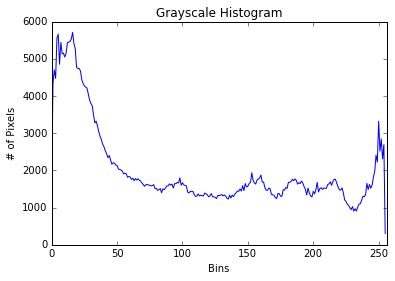

In [6]:
# 灰階
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2.imshow("gray", gray)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])



# 讀取有顏色的分布圖

flattened feature vector size: 768


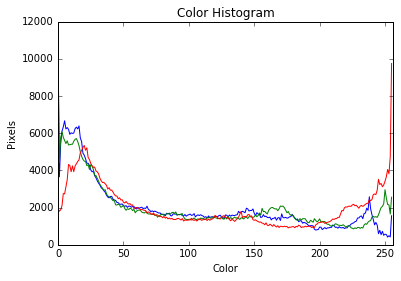

In [9]:
#分成rgb三張圖
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("Color Histogram")
plt.xlabel("Color")
plt.ylabel("Pixels")
features = []
 
# 計算三張圖，圖上每個點
for (chan, color) in zip(chans, colors):

    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    features.extend(hist)
 
    plt.plot(hist, color = color)
    plt.xlim([0, 256])


print "flattened feature vector size: %d" % (np.array(features).flatten().shape)

# 跑2D顏色分布圖

2D histogram shape: (32L, 32L), with 1024 values


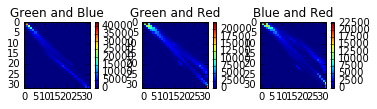

In [29]:
# 跑2d的分布圖
# 先把256色分成32區塊

fig = plt.figure()
 
# 綠和藍
ax = fig.add_subplot(331)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Green and Blue")
plt.colorbar(p)
 
# 綠和紅
ax = fig.add_subplot(332)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Green and Red")
plt.colorbar(p)
 
# 藍和紅
ax = fig.add_subplot(333)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Blue and Red")
plt.colorbar(p)
 

print "2D histogram shape: %s, with %d values" % (hist.shape, hist.flatten().shape[0])

# 畫3D.....

In [31]:
#這個印不出來啦...
hist = cv2.calcHist([image], [0, 1, 2], None, [32, 32, 32], [0, 256, 0, 256, 0, 256])
print "3D histogram shape: %s, with %d values" % (
    hist.shape, hist.flatten().shape[0])

3D histogram shape: (32L, 32L, 32L), with 32768 values
